Variable: Jitter %
PD Group - Mean: 2.8542516377649325, Standard Deviation: 1.681113428088835
Healthy Group - Mean: 2.5074211538461535, Standard Deviation: 1.8311703653855098
Mean Difference: 0.35
-----------------------------


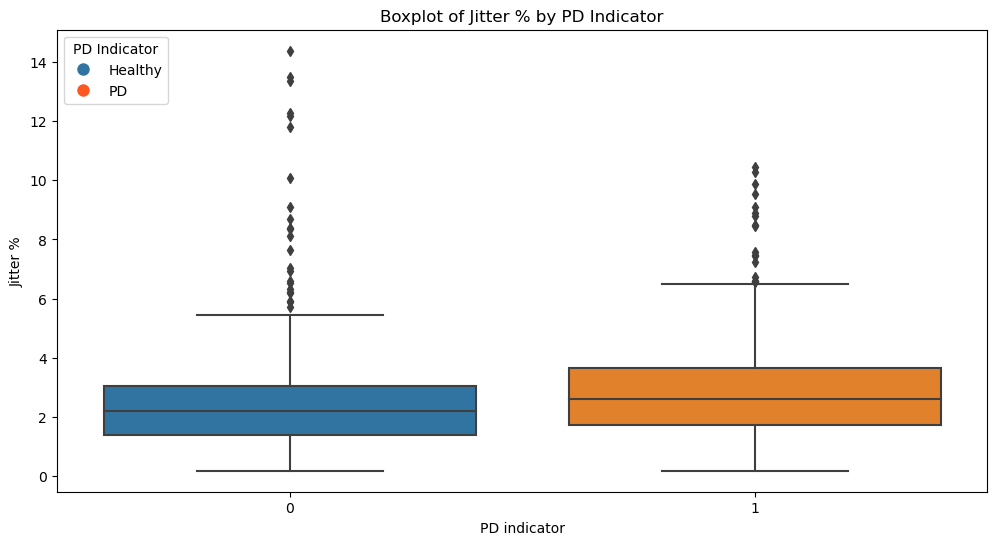

NameError: name 'HTML' is not defined

In [31]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset into a DataFrame 
data = pd.read_csv('../po1_data.txt')

data.columns = ['Subject identifier', 'Jitter %', 'Jitter ms', 'Jitter r.a.p', 'Jitter p.p.q.5', 'Jitter d.d.p',
             'Shimmer %', 'Shimmer dB', 'Shimmer a.p.q.3', 'Shimmer a.p.q.5', 'Shimmer a.p.q.11', 'Shimmer d.d.a',
             'Harmonicity (autocorrelation)', 'Harmonicity NHR', 'Harmonicity HNR', 'Median Pitch', 'Mean Pitch', 
              'SD Pitch', 'Minimum Pitch', 'Maximum Pitch', 'Pulse (no)', 'Pulse (No. of periods)', 
              'Pulse (mean period)', 'Pulse (SD period)', 'Voice (unframed voice)', 'Voice (no. of breaks)', 
             'Voice (degree of breaks)', 'UPDRS', 'PD indicator']

# List of variables of interest
salientVariables = [
    'Jitter %', 'Jitter ms', 'Jitter r.a.p', 'Jitter p.p.q.5', 'Jitter d.d.p',
    'Shimmer %', 'Shimmer dB', 'Shimmer a.p.q.3', 'Shimmer a.p.q.5', 'Shimmer a.p.q.11', 'Shimmer d.d.a',
    'Harmonicity (autocorrelation)', 'Harmonicity NHR', 'Harmonicity HNR', 'Median Pitch', 'Mean Pitch',
    'SD Pitch', 'Minimum Pitch', 'Maximum Pitch', 'Pulse (no)', 'Pulse (No. of periods)',
    'Pulse (mean period)', 'Pulse (SD period)', 'Voice (unframed voice)', 'Voice (no. of breaks)',
    'Voice (degree of breaks)'
]

# Iterate through each variable
for variable in salientVariables:
    # Create a custom legend inside the loop
    cmap = sns.color_palette(["#3274a1", "#FF5722"])  # Green for healthy, Orange for PD
    legend_labels = {0: 'Healthy', 1: 'PD'}
    
    # Separate data into Parkinson's Disease (PD) and healthy groups
    pdGroup = data[data['PD indicator'] == 1]
    healthyGroup = data[data['PD indicator'] == 0]
    
    # Calculate mean and standard deviation for PD group
    pdMean = pdGroup[variable].mean()
    pdStd = pdGroup[variable].std()

    # Calculate mean and standard deviation for healthy group
    healthyMean = healthyGroup[variable].mean()
    healthyStd = healthyGroup[variable].std()
    
     # Calculate the difference between PD and Healthy group means
    mean_difference = pdMean - healthyMean

    # Print mean and standard deviation for both groups
    print(f"Variable: {variable}")
    print(f"PD Group - Mean: {pdMean}, Standard Deviation: {pdStd}")
    print(f"Healthy Group - Mean: {healthyMean}, Standard Deviation: {healthyStd}")
    print(f"Mean Difference: {mean_difference:.2f}")
    print("-----------------------------")

    # Descriptive statistics for PD group
    pdSummary = pdGroup.groupby('Subject identifier')[variable].describe()
    
    # Descriptive statistics for healthy group
    healthySummary = healthyGroup.groupby('Subject identifier')[variable].describe()

    # Visualize data distribution using a boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='PD indicator', y=variable)
    plt.title(f'Boxplot of {variable} by PD Indicator')

    
     # Create a legend axis and add the legend to it
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap[i], markersize=10, label=legend_labels[i]) for i in range(2)]
    common_legend = plt.legend(handles=legend_handles, title="PD Indicator", loc='upper left')
    plt.show()

    # Perform a t-test for means comparison
    t_statistic, p_value = stats.ttest_ind(pdGroup[variable], healthyGroup[variable])
    print(f"Variable: {variable}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # Calculate Cohen's d effect size
    pdMean = pdGroup[variable].mean()
    healthyMean = healthyGroup[variable].mean()
    pdStd = pdGroup[variable].std()
    healthyStd = healthyGroup[variable].std()
#     effectSize = (pdMean - healthyMean) / ((pdStd + healthyStd) / 2)
#     print(f"Effect Size (Cohen's d): {effectSize}")
    print('\x1b[1;31m'+'--------------------------------------------------------------------------------------------------------------------'+'\x1b[0m')
    print('\x1b[1;31m'+'--------------------------------------------------------------------------------------------------------------------'+'\x1b[0m')
   

# Select relevant columns for correlation analysis
selectedData = data[salientVariables]

# Calculate correlation matrix
correlationMatrix = selectedData.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Salient Variables")
plt.show()